<hr style="height:2px;border:none"/>
<h1 align='center'> INF-280 Estadística Computacional II-2022 </h1>

<H3 align='center'> Tema 8 - Test de Hipótesis  </H3>

\


Nombre del equipo: 

Integrantes:


*   Nombre Integrante 1 - ROL - [video](https://youtu.be/A6O67uLJfcQ)
*   Nombre Integrante 2 - ROL - [video](https://youtu.be/A6O67uLJfcQ)
*   Nombre Integrante 3 - ROL - [video](https://youtu.be/A6O67uLJfcQ)


*Recuerden que si su equipo se llama "El ritmo no perdona", entonces el nombre del archivo a subir debe ser T8_El_ritmo_no_perdona.ipynb*


### **Formalidades**  
* Es posible utilizar apuntes, libros, papers, ejemplos y cualquier otro material que desee de internet, pero debe ser usted quien desarrolle los ejercicios y comente los resultados en el Notebook que entregará. 
* Se permite el uso de las librerías: pandas, numpy, matplotlib y seaborn. Si desea utilizar otra librería debe indicar cómo instalarla.
* Se debe trabajar en grupos de **dos o tres personas**, las cuales deberán estar inscritas a través de __[Aula](https://aula.usm.cl/)__.
* Además del Notebook, deberán entregar un video explicando lo que hizo, paso a paso, como en los ejemplos entregados en AULA. Este vídeo es **individual**, es decir, cada integrante debe hacerlo por separado (debiendo utilizar el mismo Jupyter Notebook). El video puede ser subido a una plataforma externa como Youtube, Google Drive, ó Dropbox. El **link a compartir** (*visible para cualquier usuario con el link*) debe ir dentro del Notebook.
* La nota de esta actividad es grupal.


<hr style="height:2px;border:none"/>

### **Entrega** 
* **Formato**: Se debe realizar una **única** entrega por grupo (un representate del grupo) a través de  __[**Aula**](https://aula.usm.cl/)__.
* **Archivo**: El nombre del archivo a subir debe ser **T8_Nombre_Del_Equipo.ipynb**, por ejemplo, si su equipo se llama "El ritmo no perdona", entonces el nombre del archivo debe ser **T8_El_ritmo_no_perdona.ipynb**
* **Archivo**: Sus respuestas deben ser entregadas en forma de Jupyter Notebook, incluyendo **todos links** a los vídeos explicativos, uno por cada integrante.
    * **Vídeo**: Debe grabar la pantalla (Jupyter Notebok) donde se realiza la explicación de la actividad, con una duración máxima de 25 minutos.
* **Fecha límite**: Martes 6 de Diciembre a las 23:59

<hr style="height:2px;border:none"/>

### **Descuentos**

* Se descontarán 5 puntos si el nombre del archivo subido no sigue el formato señalado.
* Se descontarán 10 puntos por cada hora de atraso en la entrega.
* Todos los gráficos que realicen deben contener los nombres de las variables en los ejes. Se descontarán 3 puntos por cada nombre faltante.

<hr style="height:2px;border:none"/>

<table align='left'>
<tr>
<td><img src='https://comunicacion.uaa.mx/revista/wp-content/uploads/2019/01/discurso-620x350.png' width='650'/> </td>
</tr>
</table>

## Contexto

La Universidad de Harvard ha recopilado una serie de discursos para medir el nivel de populismo en los discursos de 241 jefes ejecutivos (presidentes y primeros ministros) de 74 países de todos los continentes. El conjunto de datos cubre 324 mandatos gubernamentales e incluye 1240 discursos, en su mayoría entre 2000 y 2022. 

El dataset `gpd_v2_20220427.csv` está compuesto por los siguientes atriibutos:

1.   `merging_variable`: name of the .txt file in the folder with Speeches with the speech that matches that coder’s score.
2.   `Country`
3.   `Leader`: name of president or prime minister.
4.   `lr`: categorical indicator with -1 = left; 0 = center; 1 = right.
5.   `president`: binary. 1 if the leader is a president, 0 if a prime minister.
6.   `term`: leader term in office, ordinal.
8.   `startofterm`: date of start of respective term
9.   `yearbegin`: year of beginning of term.
10.   `endofterm`: date of end of respective term.
11.   `yearend`: year of ending of respective term.
12.   `speechtype`: type of speech: international, campaign, ribbon-cutting, famous.
13.   `speechnum`: number of that speech for that leader-term.
14.   `codernum`: coder identifier for that speech-leader.
15.   `rubricgrade`: grade of that speech by that coder on the 0-2 populism scale.
16.   `averagerubric`: average populism grade for that speech. Arithmetic average across all coders for that speech.
17.    `totalaverage`: average populism grade for that leader-term. Arithmetic mean for all speeches by all coders for that leader-term
18.    `wb_region`: World Bank global region classification.

# Librerías

In [156]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm, t
from scipy.stats import f as fisher

#H0: mu1 = mu0 (mu1 desconocida, m0 valor fijo)
def contrate_1media(n1,media1,std1,mu0,error_tipo1,alternativa='1>0'):
  region_critica = []
  gl = n1-1
  std_error = np.sqrt(std1**2/n1)
  T0 = (media1-mu0)/std_error#estadistico bajo H0
  if (alternativa=='1>0'):
    region_critica.append(pd.Interval(left=t.ppf(1-error_tipo1,df=gl), right=np.inf,closed='neither'))
    p_value = 1-t.cdf(T0,df=gl)
  elif (alternativa=='1<0'):
    region_critica.append(pd.Interval(left=-np.inf, right=t.ppf(error_tipo1,df=gl),closed='neither'))
    p_value = t.cdf(T0,df=gl)
  else:#dos colas
    region_critica.append(pd.Interval(left=-np.inf,right=t.ppf(error_tipo1/2,df=gl),closed='neither'))
    region_critica.append(pd.Interval(left=t.ppf(1-error_tipo1/2,df=gl),right=np.inf,closed='neither'))
    p_value = 2*min(1-t.cdf(T0,df=gl),t.cdf(T0,df=gl))
  return T0, region_critica, p_value


#H0: mu1 = mu2 (mu1,mu2 ambas no conocidas)
def contrate_2medias(n1,n2,media1,media2,std1,std2,error_tipo1,alternativa='1>2'):
  region_critica = []
  gl_num = (std1**2/float(n1) + std2**2/float(n2))**2
  gl_den = ((std1**2/float(n1))**2)/(n1-1.0) + ((std2**2/float(n2))**2)/(n2-1.0)
  gl = int(np.floor(gl_num/gl_den))
  std_error = np.sqrt(std1**2/n1 + std2**2/n2)
  T0 = (media1-media2)/std_error#estadistico bajo H0
  if (alternativa=='1>2'):
    region_critica.append(pd.Interval(left=t.ppf(1-error_tipo1,df=gl), right=np.inf,closed='neither'))
    p_value = 1-t.cdf(T0,df=gl)
  elif (alternativa=='1<2'):
    region_critica.append(pd.Interval(left=-np.inf, right=t.ppf(error_tipo1,df=gl),closed='neither'))
    p_value = t.cdf(T0,df=gl)
  else:#dos colas
    region_critica.append(pd.Interval(left=-np.inf,right=t.ppf(error_tipo1/2,df=gl),closed='neither'))
    region_critica.append(pd.Interval(left=t.ppf(1-error_tipo1/2,df=gl),right=np.inf,closed='neither'))
    p_value = 2*min(1-t.cdf(T0,df=gl),t.cdf(T0,df=gl))
  return T0, region_critica, p_value

#H0: sigma1 = sigma2 (sigma1,sigma2 ambas no conocidas)
def contrate_dos_varianzas(n1,n2,std1,std2,error_tipo1,alternativa='1>2'):
  region_critica = []
  F0 = std1**2/std2**2
  if (alternativa=='1>2'):
    region_critica.append(pd.Interval(left=fisher.ppf(1-error_tipo1,dfn=n1-1, dfd=n2-1), right=np.inf,closed='neither'))
    p_value = 1-fisher.cdf(F0,dfn=n1-1, dfd=n2-1)
  elif (alternativa=='1<2'):
    region_critica.append(pd.Interval(left=-np.inf, right=fisher.ppf(error_tipo1,dfn=n1-1, dfd=n2-1),closed='neither'))
    p_value = fisher.cdf(F0,dfn=n1-1, dfd=n2-1)
  else:#dos colas
    region_critica.append(pd.Interval(left=-np.inf,right=fisher.ppf(error_tipo1/2,dfn=n1-1, dfd=n2-1),closed='neither'))
    region_critica.append(pd.Interval(left=fisher.ppf(1-error_tipo1/2,dfn=n1-1, dfd=n2-1),right=np.inf,closed='neither'))
    p_value = 2*min(1-fisher.cdf(F0,dfn=n1-1, dfd=n2-1),fisher.cdf(F0,dfn=n1-1, dfd=n2-1))
  return F0, region_critica, p_value


#H0: p1 = p0 (p1 desconocida, p0 valor fijo)
def contrate_1prop(n1,prop1,p0,error_tipo1,alternativa='1>0'):
  region_critica = []
  std_error = np.sqrt(p0*(1.0-p0))*np.sqrt(1.0/n1)
  Z0 = (prop1-p0)/std_error
  if (alternativa=='1>0'):
    region_critica.append(pd.Interval(left=norm.ppf(1-error_tipo1), right=np.inf,closed='neither'))
    p_value = 1-norm.cdf(Z0)
  elif (alternativa=='1<0'):
    region_critica.append(pd.Interval(left=-np.inf, right=norm.ppf(error_tipo1),closed='neither'))
    p_value = norm.cdf(Z0)
  else:#dos colas
    region_critica.append(pd.Interval(left=-np.inf,right=norm.ppf(error_tipo1/2),closed='neither'))
    region_critica.append(pd.Interval(left=norm.ppf(1-error_tipo1/2),right=np.inf,closed='neither'))
    print(">>",Z0,1-norm.cdf(Z0),norm.cdf(Z0))
    p_value = 2*min(1-norm.cdf(Z0),norm.cdf(Z0))
  return Z0, region_critica, p_value

#H0: p1 = p2 (p1,p2 no conocidas, ni funcion una de la otra)
def contrate_2props(n1,n2,prop1,prop2,error_tipo1,alternativa='1>2'):
  region_critica = []
  prop_comb = (n1*prop1 + n2*prop2)/(n1+n2)
  print(prop_comb)
  std_error = np.sqrt(prop_comb*(1.0-prop_comb))*np.sqrt(1.0/n1 + 1.0/n2)
  Z0 = (prop1-prop2)/std_error

  if (alternativa=='1>2'):
    region_critica.append(pd.Interval(left=norm.ppf(1-error_tipo1), right=np.inf,closed='neither'))
    p_value = 1-norm.cdf(Z0)
  elif (alternativa=='1<2'):
    region_critica.append(pd.Interval(left=-np.inf, right=norm.ppf(error_tipo1),closed='neither'))
    p_value = norm.cdf(Z0)
  else:#dos colas
    region_critica.append(pd.Interval(left=-np.inf,right=norm.ppf(error_tipo1/2),closed='neither'))
    region_critica.append(pd.Interval(left=norm.ppf(1-error_tipo1/2),right=np.inf,closed='neither'))
    print(">>",Z0,1-norm.cdf(Z0),norm.cdf(Z0))
    p_value = 2*min(1-norm.cdf(Z0),norm.cdf(Z0))
  return Z0, region_critica, p_value


# Datos

In [157]:
data = pd.read_csv("gpd_v2_20220427.csv")

# Preguntas

---

**Importante** para las siguientes preguntas:
* Indique explicitamente **los supuestos** que consideraron.
* Indique explicitamente **$H_0$** y **$H_1$**.
* Indique explicitamente el valor del **Estadístico de Contraste**.
* Indique explicitamente la **Región Crítica**.
* Indique explicitamente si **se acepta $H_0$** o **se rechaza $H_0$**.

---

1. Considerando solo los discursos realizados en  `region=Latin America & Caribbean` y `region=Western Europe` desde el año 2000 en adelante y solamente aquellos realizados en campaña (`speechtype = Campaign`). 

> a) Diseñe un contraste que permita evaluar la hipótesis de que "*los discursos realizados por presidentes de izquierda (`lr = -1`) tienen un populismo (`rubricgrade`) promedio **distinto** en ambas regiones*". Diseñe su contraste de manera que la probabilidad de aceptar incorrectamente esta conjetura sea menor al 5%. **(10 pts)**

> b) Diseñe un contraste que permita evaluar la hipótesis de que "*los discursos realizados por presidentes de centro (`lr = 0`) tienen un populismo (`rubricgrade`) promedio **distinto** en ambas regiones*". Diseñe un contraste de manera que la probabilidad de aceptar incorrectamente esta conjetura sea menor al 5%. **(10 pts)**

> c) Diseñe un contraste que permita evaluar la hipótesis de que "*los discursos realizados por presidentes de derecha (`lr = 1`) tienen un populismo (`rubricgrade`) promedio **distinto** en ambas regiones*". Diseñe un contraste de manera que la probabilidad de aceptar incorrectamente esta conjetura sea menor al 5%. **(10 pts)**

2. Considerando solo los discursos realizados en Chile desde el año 2000 en adelante. Diseñe un contraste que permita evaluar la hipótesis de que "*los discursos realizados por presidentes de izquierda (`lr = -1`) son **más populistas** (utilice `rubricgrade`) que los discursos realizados por presidentes de derecha (`lr = -1`)*". Diseñe un contraste de manera que la probabilidad de aceptar incorrectamente esta conjetura sea menor al 5%.  **(10 pts)**

3. En Chile, Michelle Bachelet y Sebastián Piñera han sido dos veces presidente de la república. Por esto, podría resultar interesante determinar si sus niveles de populismo (utilice `rubricgrade`) en sus discursos cambiaron en algo durante sus dos mandatos. 

> a) Ejecute un contraste donde $H_0$ corresponda a que "*los discursos de "Bachelet 1" son **igual o más populistas** que los discursos de "Bachelet 2"* ". Considere $α =  5\%$. **(15 pts)**

> b) Ejecute un contraste donde $H_0$ corresponda a que "*los discursos de "Piñera 1" son **igual o más populistas** que los discursos de "Piñera 2"* ". Considere $α =  5\%$. **(15 pts)**

4. En los últimos 20 años Argentina ha aumentado su nivel de pobreza, donde más del 25% de la población del país se encuentra en esta situación.

> a) Diseñe un contraste que permita evaluar la hipótesis de que "*el populismo (utilice `rubricgrade`) promedio en los discursos de presidentes argentinos es mayor a 0.5*". Diseñe un contraste de manera que la probabilidad de aceptar incorrectamente esta conjetura sea menor al 5%. **(10 pts)**

> b) Diseñe un contraste que permita evaluar la hipótesis de que "*los discursos realizados por presidentes argentinos son más populistas que los discursos realizados por el resto de países de `region=Latin America & Caribbean`*". Diseñe un contraste de manera que la probabilidad de aceptar incorrectamente esta conjetura sea menor al 5%  **(10 pts)**

**Debido a los problemas con el dataset de la pregunta 5), se ha decidido eliminar dicha pregunta. Por esto, se otorgará un puntaje base de 20 pts.**

# Ejemplo Test de Hipótesis:


En un test de hipótesis, la hipótesis nula ($H_0$) corresponde al *status quo*, es decir, a lo que se "cree que es lo normal". En cambio, la hipótesis alternativa es lo que se "sospecha" que ocurre.





Ejemplo:

Diseñe un contraste que permita evaluar la hipótesis de que "la media de la población X es distinta a la media de la población Y". Diseñe un contraste de manera que la probabilidad de aceptar incorrectamente esta conjetura sea menor al 5%.

En este caso, se tiene que:
* $H_0$: $μ_X = \mu_Y$ (Corresponde a lo que se cree "normal")
* $H_1$: $μ_X \neq \mu_Y$

Además, se plantean de esta manera las hipótesis ya que "aceptar incorrectamente la conjetura" corresponde a un error tipo 1 (valor de $α$) y se sabe que siempre se debe acotar este tipo de error, pues es más grave que un error tipo 2.

# Respuestas

# Pregunta 3

En Chile, Michelle Bachelet y Sebastián Piñera han sido dos veces presidente de la república. Por esto, podría resultar interesante determinar si sus niveles de populismo (utilice `rubricgrade`) en sus discursos cambiaron en algo durante sus dos mandatos. 

> a) Ejecute un contraste donde $H_0$ corresponda a que "*los discursos de "Bachelet 1" son **igual o más populistas** que los discursos de "Bachelet 2"* ". Considere $α =  5\%$. **(15 pts)**

> b) Ejecute un contraste donde $H_0$ corresponda a que "*los discursos de "Piñera 1" son **igual o más populistas** que los discursos de "Piñera 2"* ". Considere $α =  5\%$. **(15 pts)**

a) Para esta pregunta, tendremos que nuestra hipótesis es la siguiente:

+ $ H_0 $ = Los discursos de Bachelet 1 son igual o más populistas que el de Bachelet 2

En notación matemática:

+ $ H_0 : {Discurso\ 1}_{rubricgrade} \geq {Discurso\ 2}_{rubricgrade}$

Por ende, tendremos que la hipótesis alternativa será:

+ $ H_1 $ = Los discursos de Bachelet 1 son menos populistas que el de Bachelet 2

En notación matemática:

+ $ H_1 : {Discurso\ 1}_{rubricgrade} \lt {Discurso\ 2}_{rubricgrade}$

Luego, nuestro parámetro $\theta$ será el nivel de populísmo (medido en el dataset como `rubricgrade`). Partanos mostrando por pantalla los datos de forma general, sin filtrar nada y eligiendo las columnas que a nosotros más nos competen (el año de entrada, el nombre del presidente y su grado de populismo).


<Axes: xlabel='rubricgrade', ylabel='Density'>

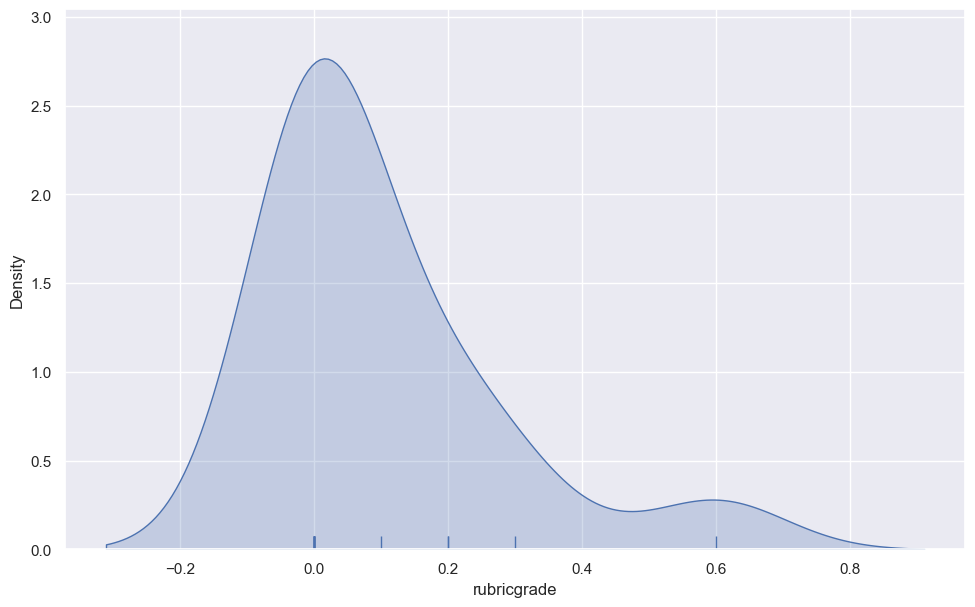

In [158]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
f = plt.figure(figsize=(10,6))
ax = f.add_axes([0.1, 0.1, 0.9, 0.9])

# Lee los datos desde el dataset
data = pd.read_csv("gpd_v2_20220427.csv")

# Filtra por el presidente 'Michele Bachelet'
data_bachelet = data[data['leader'] == 'Michelle Bachelet']
data_bachelet = data_bachelet[['leader', 'yearbegin', 'rubricgrade']]

# Filtra por el índice de populismo (0-2)
data_bachelet_populism = data_bachelet.rubricgrade

# Los muestra en un gráfico contínuo
sns.distplot(data_bachelet_populism, ax=ax, rug=True, hist=False, kde=True, kde_kws={"shade": True}, label = 'Distribución de Populísmo')

Para suplir nuestra falta de conocimiento general y para más certeza, usamos Python para saber en que años la presidenta asumió el mandato, para así poder corroborar que tuvo dos periodos presidenciales y para saber como filtrar los datos.

In [159]:
column_list = data_bachelet.columns.values.tolist()
print(data_bachelet['yearbegin'].unique())

[2014 2006]


Ahora usamos un contraste de 2 medias con alternativa bilateral, usando el $\alpha = 0.05$

In [160]:
# Filstramos los datos por las fechas de mandato
data_bachelet_2014 = data[data['yearbegin'] == 2014]
data_bachelet_2006 = data[data['yearbegin'] == 2006]
data_bachelet_2014_populism = data_bachelet_2014['rubricgrade']
data_bachelet_2006_populism = data_bachelet_2006['rubricgrade']

print("La media entre el primer y segundo periodo presidencial de Bachelet")
media1 = data_bachelet_2006_populism.median()
media2 = data_bachelet_2014_populism.median()
print(data_bachelet_2006_populism.median())
print(data_bachelet_2014_populism.median())

print("La desviación estándar entre el primer y segundo periodo presidencial de Bachelet")
std1 = np.std(data_bachelet_2006_populism)
std2 = np.std(data_bachelet_2014_populism)
print(std1)
print(std2)

print("El n de el primer y segundo periodo presidencial de Bachelet")
n1 = len(data_bachelet_2006_populism)
n2 = len(data_bachelet_2014_populism)
print(n1)
print(n2)

print("Nuestro alpha")
error_tipo1 = 0.05
print(error_tipo1)

print("Contraste de H0")
contraste_h0 = contrate_2medias(n1,n2,media1,media2,std1,std2,error_tipo1,alternativa='1>2')
print(contraste_h0)

La media entre el primer y segundo periodo presidencial de Bachelet
0.0
0.1
La desviación estándar entre el primer y segundo periodo presidencial de Bachelet
0.6572315962737312
0.5751572917609648
El n de el primer y segundo periodo presidencial de Bachelet
308
344
Nuestro alpha
0.05
(-2.056685547041562, [Interval(1.6473431678534394, inf, closed='neither')], 0.9799304249789696)


# Disclaimer 

Los datos aquí utilizados fueron obtenidos usando la metodología detallada en [1] y por lo tanto no necesariamente reflejan la opinión de los profesores o ayudantes de este curso. Cualquier alusión a personas o países es meramente circustancial y tiene sólo fines pedagógicos. Todo público puede acceder a los datos en [2] 

[1] Hawkins, K. A., Aguilar, R., Silva, B. C., Jenne, E. K., Kocijan, B., & Kaltwasser, C. R. (2019, June). Measuring populist discourse: The global populism database. In EPSA Annual Conference in Belfast, UK, June (pp. 20-22).

[2] Hawkins, Kirk A.; Aguilar, Rosario; Castanho Silva, Bruno; Jenne, Erin K.; Kocijan, Bojana; Rovira Kaltwasser, Cristóbal, 2019, "Global Populism Database", https://doi.org/10.7910/DVN/LFTQEZ, Harvard Dataverse, V2